In [106]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,roc_curve
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import matplotlib.pylab as py
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

In [90]:
df = pd.read_hdf("singlepi_e100GeV_pu200_oct27.h5")

In [91]:
len(df)

32274

In [92]:
corr1= df.drop(['trckType'],1,inplace=False).corr()
corr1.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)


,event,trackster,purity,layer,E,eta,phi,x,y,z,nHits,trckEn,trckEta,trckPhi
event,1,0.04,0.0085,0.0049,0.013,0.048,0.37,-0.16,0.36,0.011,0.012,-0.12,0.037,0.4
trackster,0.04,1,0.051,-0.11,-0.0042,-0.058,-0.065,-0.068,-0.064,-0.087,0.026,-0.54,-0.021,-0.078
purity,0.0085,0.051,1,0.56,0.35,-0.29,0.0083,0.47,0.011,0.52,0.35,-0.1,-0.17,-0.013
layer,0.0049,-0.11,0.56,1,0.28,0.016,0.015,0.39,0.017,0.92,0.13,0.12,-0.023,0.011
E,0.013,-0.0042,0.35,0.28,1,-0.088,0.021,0.19,0.025,0.27,0.68,0.012,-0.065,0.016
eta,0.048,-0.058,-0.29,0.016,-0.088,1,0.015,-0.81,0.014,-0.028,-0.067,0.31,0.53,0.056
phi,0.37,-0.065,0.0083,0.015,0.021,0.015,1,-0.12,0.99,0.0039,0.019,-0.0046,0.049,0.95
x,-0.16,-0.068,0.47,0.39,0.19,-0.81,-0.12,1,-0.12,0.46,0.1,-0.11,-0.5,-0.15
y,0.36,-0.064,0.011,0.017,0.025,0.014,0.99,-0.12,1,0.0028,0.022,-0.003,0.05,0.94
z,0.011,-0.087,0.52,0.92,0.27,-0.028,0.0039,0.46,0.0028,1,0.11,0.092,-0.062,-0.0018


C:\Users\20184731\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\20184731\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\20184731\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


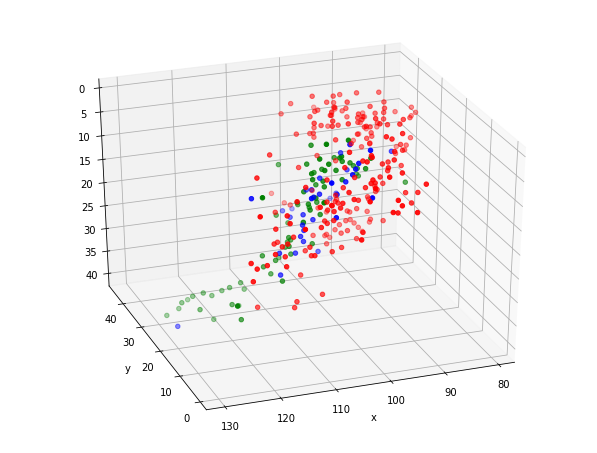

In [93]:
fig = py.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(df[df.event == 1][df.trackster==0.0][df.purity == 2]['x'],df[df.event == 1][df.trackster==0.0][df.purity == 2]['y'], df[df.event == 1][df.trackster==0.0][df.purity == 2]['layer'], c='G')
ax.scatter(df[df.event == 1][df.trackster==0.0][df.purity == 0]['x'],df[df.event == 1][df.trackster==0.0][df.purity == 0]['y'], df[df.event == 1][df.trackster==0.0][df.purity == 0]['layer'], c='R')
ax.scatter(df[df.event == 1][df.trackster==0.0][df.purity == 1]['x'],df[df.event == 1][df.trackster==0.0][df.purity == 1]['y'], df[df.event == 1][df.trackster==0.0][df.purity == 1]['layer'], c='B')
py.xlabel("x")
py.ylabel("y")
#zlanel phi
#py.title("all events, layer1, non pileup")
py.show()

In [115]:
#remove highly corrleated features 
clean_df = df.drop(['eta','phi','layer','trckPhi','trckEn','trckEta','trckType'],1,inplace=False)

In [116]:
clean_df['purity']=clean_df['purity'].apply(lambda x: 0 if x <=1 else 1 )

trainDF=clean_df.sample(frac=0.8,random_state=200) #random state is a seed value
testDF=clean_df.drop(trainDF.index)

yTrain = trainDF[['purity']].iloc[:,0]
yTest =  testDF[['purity']].iloc[:,0]

xTrain = trainDF.drop(['purity','event','trackster'],1,inplace=False)
xTest = testDF.drop(['purity','event','trackster'],1,inplace=False)

sc = StandardScaler()
xTrain_sc = sc.fit_transform(xTrain)
xTest_sc = sc.transform(xTest)


In [96]:
clf0 = RandomForestClassifier(max_depth=40,n_estimators=100,random_state=1234).fit(xTrain, yTrain)
y0TestPred = clf0.predict(xTest) 
y0TestPredProba = clf0.predict_proba(xTest)

print("Testing confusion_matrix")
print(confusion_matrix(yTest, y0TestPred))

print("Test accuracy")
print(sklearn.metrics.accuracy_score(yTest, y0TestPred))
print("Test Percision")
print(sklearn.metrics.precision_score(yTest, y0TestPred))
print("Test recall")
print(sklearn.metrics.recall_score(yTest, y0TestPred))
print("Test F1 score")
print(sklearn.metrics.f1_score(yTest, y0TestPred))

Testing confusion_matrix
[[5026  154]
 [ 191 1084]]
Test accuracy
0.9465530596436871
Test Percision
0.875605815831987
Test recall
0.8501960784313726
Test F1 score
0.8627138877835258


In [117]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,"b--",linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate", fontsize=16)

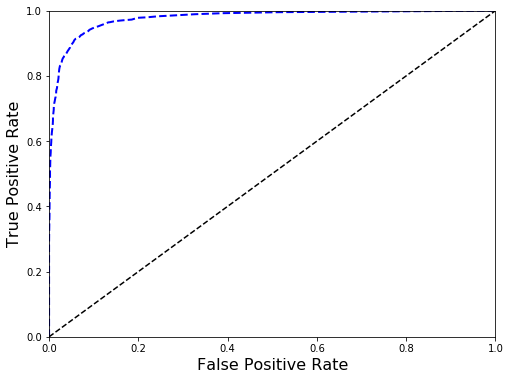

In [128]:
fpr,tpr,thresholds=roc_curve(yTest,y0TestPredProba[:,1])
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()


In [133]:
clf2 = MLPClassifier(alpha=0.05, hidden_layer_sizes=(16, 16, 16), random_state=1234).fit(xTrain_sc, yTrain)
y2TestPred = clf2.predict(xTest_sc) 
y2TestPredProba = clf2.predict_proba(xTest_sc)

print("Testing confusion_matrix")
print(confusion_matrix(yTest, y2TestPred))

print("Test accuracy")
print(sklearn.metrics.accuracy_score(yTest, y2TestPred))
print("Test Percision")
print(sklearn.metrics.precision_score(yTest, y2TestPred))
print("Test recall")
print(sklearn.metrics.recall_score(yTest, y2TestPred))
print("Test F1 score")
print(sklearn.metrics.f1_score(yTest, y2TestPred))

Testing confusion_matrix
[[4983  197]
 [ 290  985]]
Test accuracy
0.9245546088303641
Test Percision
0.8333333333333334
Test recall
0.7725490196078432
Test F1 score
0.8017908017908019


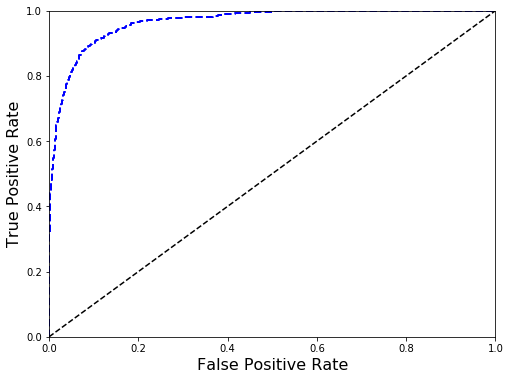

In [135]:
fpr,tpr,thresholds=roc_curve(yTest,y2TestPredProba[:,1])
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [136]:
clf3 = SVC(C=5,kernel='rbf', gamma=1, probability=True).fit(xTrain_sc, yTrain)
y3TestPred = clf3.predict(xTest_sc) 
y3TestPredProba = clf3.predict_proba(xTest_sc)

print("Testing confusion_matrix")
print(confusion_matrix(yTest, y3TestPred))

print("Test accuracy")
print(sklearn.metrics.accuracy_score(yTest, y3TestPred))
print("Test Percision")
print(sklearn.metrics.precision_score(yTest, y3TestPred))
print("Test recall")
print(sklearn.metrics.recall_score(yTest, y3TestPred))
print("Test F1 score")
print(sklearn.metrics.f1_score(yTest, y3TestPred))

Testing confusion_matrix
[[5010  170]
 [ 326  949]]
Test accuracy
0.9231603408210689
Test Percision
0.8480786416443253
Test recall
0.744313725490196
Test F1 score
0.7928153717627403


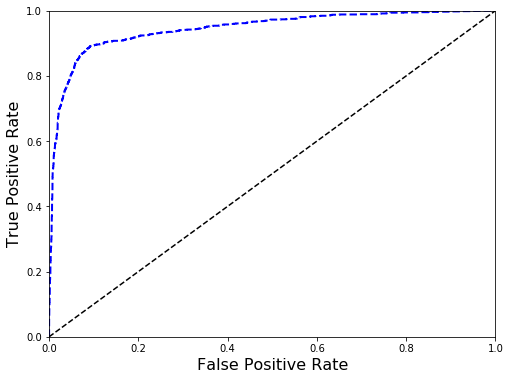

In [137]:
fpr,tpr,thresholds=roc_curve(yTest,y3TestPredProba[:,1])
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [101]:
clf4 = XGBClassifier(max_depth=50,random_state=1234).fit(xTrain_sc, yTrain)
y4TestPred = clf4.predict(xTest_sc) 
y4TestPredProba = clf4.predict_proba(xTest_sc)

print("Testing confusion_matrix")
print(confusion_matrix(yTest, y4TestPred))

print("Test accuracy")
print(sklearn.metrics.accuracy_score(yTest, y4TestPred))
print("Test Percision")
print(sklearn.metrics.precision_score(yTest, y4TestPred))
print("Test recall")
print(sklearn.metrics.recall_score(yTest, y4TestPred))
print("Test F1 score")
print(sklearn.metrics.f1_score(yTest, y4TestPred))

Testing confusion_matrix
[[5017  163]
 [ 192 1083]]
Test accuracy
0.9450038729666925
Test Percision
0.8691813804173355
Test recall
0.8494117647058823
Test F1 score
0.8591828639428798


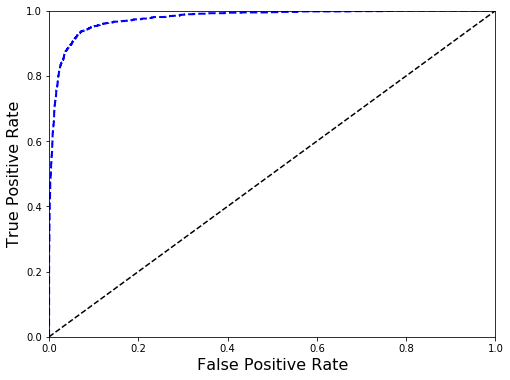

In [122]:
fpr,tpr,thresholds=roc_curve(yTest,y4TestPredProba[:,1])
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

# Crossvalidation of the 4 models

In [107]:
X=clean_df.drop(['purity','event','trackster'],1,inplace=False)
X_sc = sc.fit_transform(X)
y=clean_df[['purity']].iloc[:,0]

models = [clf0, clf2, clf3, clf4]
names = ["RandomForest", "MLPClassifier", "SVC", "XGBClassifier"]
scoring = {'accuracy': 'accuracy','f1': 'f1'}

In [110]:
for model, name in zip(models, names):
    print (name)
    cv_results=cross_validate(model, X_sc, y, scoring=scoring, cv=5, return_train_score=True)
    print("test_accuracy", cv_results['test_accuracy'])
    print("test_f1", cv_results['test_f1'])
    print("----------------------------------------------")

RandomForest
test_accuracy [0.89389715 0.92455461 0.90611929 0.93507902 0.92283855]
test_f1 [0.68065268 0.81348142 0.7277628  0.834714   0.78460208]
----------------------------------------------
MLPClassifier
test_accuracy [0.89513631 0.93369481 0.91603408 0.93120545 0.92376821]
test_f1 [0.67561092 0.83136328 0.76038904 0.82324841 0.78719723]
----------------------------------------------
SVC
test_accuracy [0.89699504 0.92687839 0.9120062  0.92609235 0.92531763]
test_f1 [0.68852459 0.81519186 0.7425204  0.80835677 0.79206212]
----------------------------------------------
XGBClassifier
test_accuracy [0.89064436 0.9211464  0.9087529  0.92981097 0.9208243 ]
test_f1 [0.6685446  0.80843056 0.74223195 0.82435052 0.78002583]
----------------------------------------------


## stacking of the 3 models with a meta-model

In [112]:
from vecstack import stacking
Stacking_train, Stacking_test = stacking(models,                     # list of models
                           xTrain_sc, yTrain, xTest_sc,   # data
                           regression=False,           # classification task (if you need 
                                                       #     regression - set to True)
                           mode='oof_pred_bag',        # mode: oof for train set, predict test 
                                                       #     set in each fold and vote
                           needs_proba=False,          # predict class labels (if you need 
                                                       #     probabilities - set to True) 
                           metric=accuracy_score,      # metric: callable
                           n_folds=5,                  # number of folds
                           random_state=1234)           # ensure reproducibility          

In [113]:
# Initialize 2nd level model
metaModel_XGB = XGBClassifier(max_depth=25,random_state=1234, n_estimators=100)

# Fit 2nd level model
clf_meta_xgb = metaModel_XGB.fit(Stacking_train, yTrain)

# Predict
Stacking_y_pred = clf_meta_xgb.predict(Stacking_test)

print("Testing confusion_matrix")
print(confusion_matrix(yTest, Stacking_y_pred))

print("Test accuracy")
print(sklearn.metrics.accuracy_score(yTest, Stacking_y_pred))
print("Test Percision")
print(sklearn.metrics.precision_score(yTest, Stacking_y_pred))
print("Test recall")
print(sklearn.metrics.recall_score(yTest, Stacking_y_pred))
print("Test F1 score")
print(sklearn.metrics.f1_score(yTest, Stacking_y_pred))

Testing confusion_matrix
[[5028  152]
 [ 182 1093]]
Test accuracy
0.9482571649883811
Test Percision
0.8779116465863454
Test recall
0.8572549019607844
Test F1 score
0.8674603174603175
